In [1]:
import pandas as pd
import numpy as np

In [2]:

circuits = pd.read_csv('../raw_data/circuits.csv')
constructor_results = pd.read_csv('../raw_data/constructor_results.csv')
constructor_standings = pd.read_csv('../raw_data/constructor_standings.csv')
constructors = pd.read_csv('../raw_data/constructors.csv')
driver_standings = pd.read_csv('../raw_data/driver_standings.csv')
drivers = pd.read_csv('../raw_data/drivers.csv')
lap_times = pd.read_csv('../raw_data/lap_times.csv')
pit_stops = pd.read_csv('../raw_data/pit_stops.csv')
qualifying = pd.read_csv('../raw_data/qualifying.csv')
races = pd.read_csv('../raw_data/races.csv')
results = pd.read_csv('../raw_data/results.csv')
seasons = pd.read_csv('../raw_data/seasons.csv')
sprint_results = pd.read_csv('../raw_data/sprint_results.csv')
status = pd.read_csv('../raw_data/status.csv')

In [3]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
71,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
72,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
73,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
74,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [4]:
constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12125,16625,1092,3,2.0,\N
12126,16626,1092,1,1.0,\N
12127,16627,1092,213,0.0,\N
12128,16628,1092,210,0.0,\N


In [5]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12886,28318,1092,213,34.0,9,9,0
12887,28319,1092,117,45.0,7,7,0
12888,28320,1092,3,8.0,10,10,0
12889,28321,1092,1,130.0,5,5,0


In [6]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [7]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33789,71667,1092,815,253.0,2,2,2
33790,71668,1092,830,366.0,1,1,12
33791,71669,1092,842,23.0,13,13,0
33792,71670,1092,20,32.0,11,11,0


In [8]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [9]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
533375,1092,842,24,17,1:48.888,108888
533376,1092,842,25,17,1:48.189,108189
533377,1092,842,26,17,1:49.689,109689
533378,1092,842,27,17,1:50.958,110958


In [10]:
display(pit_stops)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9495,1092,855,3,18,16:48:24,24.266,24266
9496,1092,840,3,19,16:50:04,23.870,23870
9497,1092,842,4,19,16:50:13,23.966,23966
9498,1092,852,3,20,16:51:53,23.756,23756


In [11]:
drivers[drivers.driverId == 822]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
821,822,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas


In [12]:
results_joined = results.merge(drivers, on='driverId', how='left')
results_joined = results_joined.merge(races, on='raceId', how='left')
results_joined = results_joined.merge(constructors, on='constructorId', how='left')
results_joined = results_joined.replace('\\N', None).replace(np.nan, None)

results_joined.to_csv('../processed_data/results.csv')


In [13]:
qualifying_joined = qualifying.merge(drivers, on='driverId', how='left')
qualifying_joined = qualifying_joined.merge(races, on='raceId', how='left')
qualifying_joined = qualifying_joined.merge(constructors, on='constructorId', how='left')

qualifying_joined = qualifying_joined.replace('\\N', None).replace(np.nan, None)

qualifying_joined['q1'] = pd.to_datetime(qualifying_joined['q1'], format='%M:%S.%f')

qualifying_joined.to_csv('../processed_data/qualifying.csv')

In [205]:
qualifying_joined_multi_index = qualifying_joined[~qualifying_joined.quali_date.isna()].set_index(['quali_date', 'driverRef']).unstack(level='driverRef')

qualifying_joined_multi_index['q1'].columns

Index(['albon', 'alonso', 'bottas', 'de_vries', 'gasly', 'giovinazzi',
       'hamilton', 'hulkenberg', 'kevin_magnussen', 'kubica', 'latifi',
       'leclerc', 'max_verstappen', 'mazepin', 'mick_schumacher', 'norris',
       'ocon', 'perez', 'raikkonen', 'ricciardo', 'russell', 'sainz', 'stroll',
       'tsunoda', 'vettel', 'zhou'],
      dtype='object', name='driverRef')

<AxesSubplot:xlabel='quali_date'>

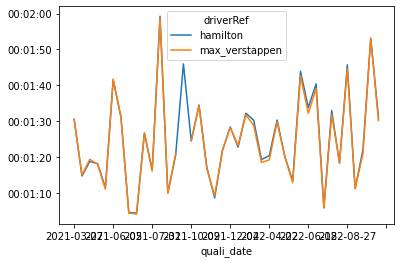

In [170]:
qualifying_joined_multi_index['q1'][['hamilton', 'max_verstappen']].plot()

<AxesSubplot:xlabel='quali_date'>

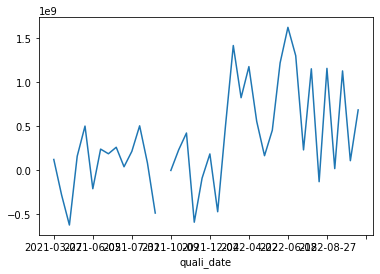

In [173]:
(qualifying_joined_multi_index['q1']['hamilton'] - qualifying_joined_multi_index['q1']['max_verstappen']).plot()

In [14]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray
